# Laboratorio 5

- Brian Carrillo
- Carlos López

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

### Parte 1

In [12]:
# Load the dataset
file_path = 'UK_foods.csv'
uk_foods_df = pd.read_csv(file_path)
uk_foods_df

,Unnamed: 0,England,Wales,Scotland,N.Ireland
0,Cheese,105,103,103,66
1,Carcass_meat,245,227,242,267
2,Other_meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats_and_oils,193,235,184,209
5,Sugars,156,175,147,139
6,Fresh_potatoes,720,874,566,1033
7,Fresh_Veg,253,265,171,143
8,Other_Veg,488,570,418,355
9,Processed_potatoes,198,203,220,187


In [13]:
# Basic statistics
basic_stats = uk_foods_df.describe()
basic_stats

,England,Wales,Scotland,N.Ireland
count,17.000000,17.000000,17.000000,17.000000
mean,469.647059,503.941176,460.235294,429.941176
std,452.701466,463.859282,469.595907,479.896014
min,54.000000,64.000000,53.000000,41.000000
25%,156.000000,175.000000,147.000000,135.000000
50%,253.000000,265.000000,242.000000,209.000000
75%,685.000000,803.000000,566.000000,586.000000
max,1472.000000,1582.000000,1572.000000,1506.000000


In [14]:
regions = ['England', 'Wales', 'Scotland', 'N.Ireland']
X = uk_foods_df[regions].values
# Normalize the data using StandardScaler (Z-score normalization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.83028135, -0.89096138, -0.78414166, -0.78171514],
       [-0.51150903, -0.6154117 , -0.47903269, -0.34998399],
       [ 0.49034683,  0.66456098,  0.63604179,  0.33520127],
       [-0.73464965, -0.76429741, -0.74243611, -0.7237214 ],
       [-0.62991018, -0.5976343 , -0.60634435, -0.47456313],
       [-0.71415715, -0.73096479, -0.6875604 , -0.62491726],
       [ 0.57003991,  0.82233539,  0.23215655,  1.2953198 ],
       [-0.49329347, -0.53096906, -0.63487972, -0.61632559],
       [ 0.04178864,  0.14679425, -0.09270767, -0.16096736],
       [-0.61852545, -0.6687439 , -0.52732332, -0.52181728],
       [-0.24966034, -0.30875158, -0.27050498, -0.2060736 ],
       [ 1.43983296,  1.40676736,  1.09041269,  0.52421789],
       [ 2.28230266,  2.39563515,  2.19890209,  2.28550915],
       [-0.93957472, -0.95762662, -0.89389308, -0.82252554],
       [ 2.05916204,  1.67120616,  2.44035523,  2.31128414],
       [-0.21550616, -0.06431235, -0.00490653, -0.63350892],
       [-0.94640555, -0.

### Parte 2

In [16]:
# Define the autoencoder model
input_dim = X_scaled.shape[1]  # Number of features (4 in this case)

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(8, activation='relu')(input_layer)  # First hidden layer
encoded = Dense(4, activation='relu')(encoded)      # Second hidden layer
bottleneck = Dense(2, activation='relu')(encoded)   # Bottleneck layer (2 dimensions)

In [17]:
# Decoder
decoded = Dense(4, activation='relu')(bottleneck)
decoded = Dense(8, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='sigmoid')(decoded)

In [18]:
# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
autoencoder.compile(optimizer=Adam(), loss='mse')

# Train the autoencoder
history = autoencoder.fit(X_scaled, X_scaled, epochs=200, batch_size=4, shuffle=True, validation_split=0.2)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.9214 - val_loss: 1.8169
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0096 - val_loss: 1.8156
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0346 - val_loss: 1.8142
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8768 - val_loss: 1.8131
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.1674 - val_loss: 1.8119
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.9357 - val_loss: 1.8109
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1232 - val_loss: 1.8098
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0176 - val_loss: 1.8086
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.2367 - val_loss: 1.8072
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.9906 - val_loss: 1.8056
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.9912 - val_loss: 1.8038
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0963 - val_los

In [19]:
# Evaluate the performance (reconstruction loss)
reconstructed = autoencoder.predict(X_scaled)
mse = np.mean(np.power(X_scaled - reconstructed, 2), axis=1)
print(f'Reconstruction MSE: {np.mean(mse)}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Reconstruction MSE: 0.48680178950700054


El valor de MSE indica que el autoencoder está capturando las características importantes del consumo de comida, pudiendo recosntruir los datos de forma generalmente correcta.

### Parte 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


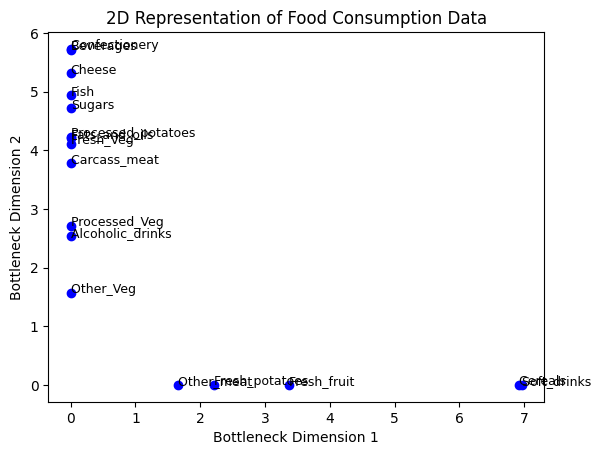


2D Representation of the Data (Bottleneck Layer):
Cheese: [0.        5.3119564]
Carcass_meat : [0.      3.78252]
Other_meat : [1.6551793 0.       ]
Fish: [0.       4.936252]
Fats_and_oils : [0.     4.2108]
Sugars: [0.        4.7121997]
Fresh_potatoes : [2.2170708 0.       ]
Fresh_Veg : [0.      4.11038]
Other_Veg : [0.       1.571829]
Processed_potatoes : [0.        4.2263427]
Processed_Veg : [0.       2.706845]
Fresh_fruit : [3.3755915 0.       ]
Cereals : [6.920362 0.      ]
Beverages: [0.        5.7053413]
Soft_drinks : [6.961063 0.      ]
Alcoholic_drinks : [0.        2.5306582]
Confectionery : [0.       5.727367]


In [22]:
# Create the encoder model to extract the bottleneck representation
encoder = Model(inputs=input_layer, outputs=bottleneck)

# Use the encoder to reduce the dimensions of the dataset
X_bottleneck = encoder.predict(X_scaled)

# Visualize the two new dimensions in a scatter plot
plt.scatter(X_bottleneck[:, 0], X_bottleneck[:, 1], color='b')

# Add labels to the points using the food types
for i, food in enumerate(uk_foods_df['Unnamed: 0']):
    plt.text(X_bottleneck[i, 0], X_bottleneck[i, 1], food, fontsize=9)

plt.title('2D Representation of Food Consumption Data')
plt.xlabel('Bottleneck Dimension 1')
plt.ylabel('Bottleneck Dimension 2')
plt.show()

# Print the bottleneck representation with food names
print("\n2D Representation of the Data (Bottleneck Layer):")
for i, food in enumerate(uk_foods_df['Unnamed: 0']):
    print(f"{food}: {X_bottleneck[i]}")


In [21]:

# Calculate the total consumption across all regions for each food item
regions = ['England', 'Wales', 'Scotland', 'N.Ireland']
uk_foods_df['Total_UK_Consumption'] = uk_foods_df[regions].sum(axis=1)

# Sort the foods by Total_UK_Consumption in descending order
sorted_uk_foods = uk_foods_df.sort_values(by='Total_UK_Consumption', ascending=False)

# Display the sorted dataframe
sorted_uk_foods[['Unnamed: 0', 'Total_UK_Consumption']]



,Unnamed: 0,Total_UK_Consumption
12,Cereals,6010
14,Soft_drinks,5708
11,Fresh_fruit,3870
6,Fresh_potatoes,3193
2,Other_meat,2824
8,Other_Veg,1831
15,Alcoholic_drinks,1443
10,Processed_Veg,1396
1,Carcass_meat,981
7,Fresh_Veg,832


Separación dimensional:
La dimensión de cuello de botella 1 Separa los tipos de alimentos como "Cereals", "Soft drinks", "Fresh fruit", "Fresh potatoes" y "Other meat" de los demás. Estos alimentos tienen niveles de consumo más altos en todo el Reino Unido en comparación con otros.
La dimensión de cuello de botella 2 parece distinguir "Cheese", "Fish", "Sugars" y "Carcass meat", entre otros; que se agrupan hacia la región superior, lo que significa que pueden tener patrones de consumo similares en determinadas regiones.

### Parte 4

1. Es posible inducir que en las cuatro regiones los alimentos más consumidos sosn los cereales, las bebidas suaves, la fruta fresca, las papas y otras carnes (pollo y cerdo). Estos son alimentos esenciales en la dieta del ser humano, por lo que es coherente que estén dentro de los más consumidos en el Reino Unido.
2. El MSE de reconstrucción indica que el error es bajo, lo cual demuestra que el autoencoder hizo un muy buen trabajo al reducir la dimensionalidad del conjunto de datos. Logró hacer una agrupación coherente y comprensible, que a su vez permitió obtener un insight adicional sobre los datos.

## Conclusiones

1. La dimensionalidad del conjunto de datos fue reducida a dos de manera exitosa, tal como lo demuestra el error de reconstrucción.
2. Los alimentos más consumidos en todo el Reino Unido, según el conjunto de datos, son los cereales, las frutas, las bebidas suaves, las papas y otras carnes.
3. Se realizaron agrupaciones exitosas sobre el conjunto de datos.